In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

import matplotlib.pyplot as plt
import seaborn as sns

## Very simple linear regression using gradient descent

In [2]:
data = load_boston()['data']
target = load_boston()['target']

df = pd.concat(
    [
        pd.DataFrame(data, columns=[f'f{i}' for i in range(1, 14)]),
        pd.DataFrame(target, columns=['target'])
    ], 
axis=1)

In [3]:
df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


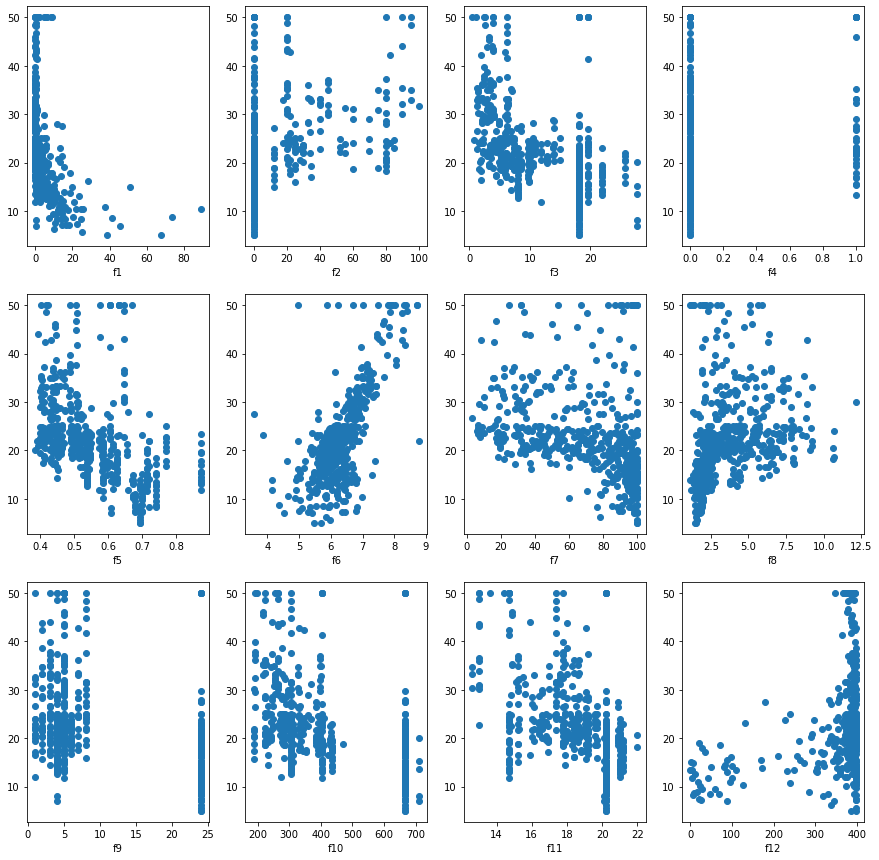

In [4]:
figure, ax = plt.subplots(3, 4, figsize=(15, 15))

counter = 1
for i in range(3):
    for j in range(4):
        ax[i][j].scatter(df[f'f{counter}'], df['target'])
        ax[i][j].set_xlabel(f'f{counter}')
        counter += 1

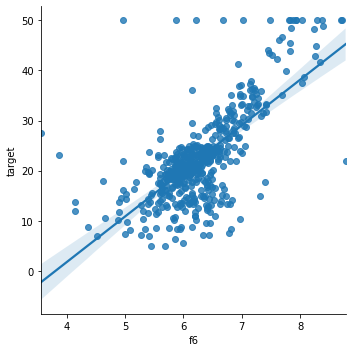

In [5]:
sns.lmplot(x='f6', y='target', data=df)

### Equations for hypothesis $h(\theta)$, cost function $J(\theta)$ and changes in parameters $\theta$ for each step and $m$ training examples

\begin{equation}
h(\theta) = \theta_0 + \theta_1x_1 \\
J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}[h(\theta) - y_i]^2 \\
\frac{\partial}{\partial \theta_1} J(\theta) = \frac{1}{m}\sum_{i=0}^{m}[(h(\theta)-y_i)x_1] \\
\frac{\partial}{\partial \theta_0} J(\theta) = \frac{1}{m}\sum_{i=0}^{m}[h(\theta)-y_i] \\
per step \\
\theta_1 := \theta_1 - \alpha\frac{\partial}{\partial \theta_1} J(\theta) \\
\theta_0 := \theta_0 - \alpha\frac{\partial}{\partial \theta_0} J(\theta)
\end{equation}

Text(0.5, 0, 'Training step')

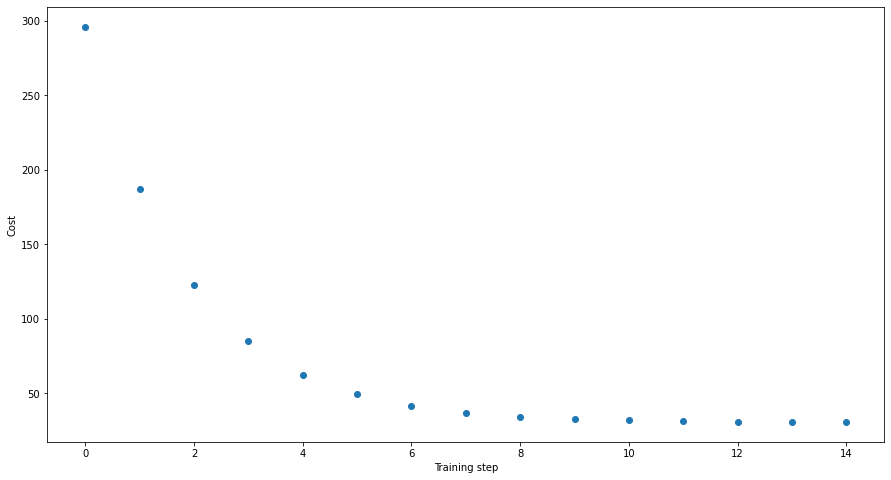

In [13]:
theta_one, theta_zero = 0, 0
m = df['f6'].shape[0]
learning_rate = 0.005
training_steps = 15

step, cost, theta_one_list, theta_zero_list  = [], [], [], []

for i in range(training_steps):
    x1 = df['f6']
    target = df['target']
    hypothesis = theta_one + theta_one*x1
    cost_function = np.square(hypothesis - target)/(2*m)
    del_cost_function_1 = ((hypothesis - target)*x1).sum()/m
    del_cost_function_2 = (hypothesis - target).sum()/m
    theta_one = theta_one - learning_rate*del_cost_function_1
    theta_zero = theta_zero - learning_rate*del_cost_function_2
    step.append(i)
    cost.append(cost_function.sum())
    theta_one_list.append(theta_one)
    theta_zero_list.append(theta_zero)
    
plt.figure(figsize=(15, 8))
plt.scatter(step, cost)
plt.ylabel('Cost')
plt.xlabel('Training step')